과제: 파이썬 딥러닝 텐서플로 ch3.1~3 필사

마감: 5월 20일 월요일 18:30

50p~ 86p 필사하여 링크를 올려주세요.

------------

# Part 03. 케라스 (Keras)

## 01. 딥러닝 준비

### 1-1. 주요 용어

1. 하이퍼파라미터
    - 사용자가 직접 설정해야 하는 값

2. 과소적합(underfitting) vs 과대적합(overfitting)
    - 과소적합 : 모델이 충분히 학습되지 않아 예측 성능이 떨어진 상태
    - 과대적합 : 학습 데이터를 지나치게 반복 학습하게 되어 과하게 적합된 상태
    - 훈련 데이터를 잘 구성해야 함

3. 에포크(epoch)
    - 에포크 : 모델 반복 훈련 시 데이터셋이 전부 학습에 사용되는 1회의 루프를 1 epoch라 한다.
    - 과소적합 -> 에포크를 늘려서 다시 학습
    - 과대적합 -> 에포크를 줄여서 최적 구간에서 학습을 조기에 종료

4. 손실함수(loss function)
    - 예측 값과 정답 값의 차이 또는 오차(Error)
    - 오차 : 딥러닝 모델의 출력 값과 실제 값과의 차이
    - 이진 분류 (binary classification)
        - binary_crossentropy 손실함수 사용
        - 출력층의 활성화함수 : 'sigmoid'
    - 다중 분류 (multiclass classification)
        - 원핫 벡터인 경우 : categorical_crossentropy 손실함수 사용
        - 레이블 값인 경우 : sparse_categorical_crossentropy 손실함수 사용
        - 출력층의 활성화 함수 : 'softmax'


In [52]:
# 클래스 및 함수 형태로 정의되어 있는 손실함수를 지정하여 사용
import tensorflow as tf

# 클래스
tf.keras.losses.BinaryCrossentropy()

# 함수
tf.keras.losses.binary_crossentropy

<function keras.src.losses.binary_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0.0, axis=-1)>

5. 경사하강법(gradient descent)
    - 딥러닝 모델을 훈련할 때, 모델 내부의 가중치(weight)에 대한 미분 값을 구하고 목적 함수 값이 낮아지는 방향으로 차감하면서 결국 최소 함수 값을 갖도록 하는 방법

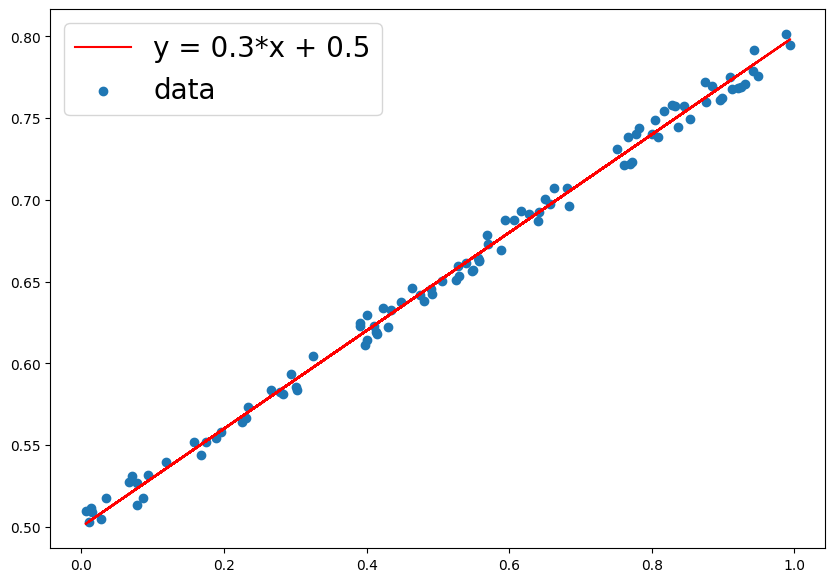

w:0.3, b:0.5


In [53]:
# 단순 선형회귀 수식(y=wx+b)이 주어졌을 때, 손실함수를 최소로 하는 w와 b를 구하는 과정을 경사하강법으로 구현
import numpy as np
import matplotlib.pyplot as plt

# 샘플에 활용할 데이터셋 만들기
def make_linear(w = 0.5, b = 0.8, size = 50, noise = 1.0):
  x = np.random.rand(size)
  y = w * x + b
  noise = np.random.uniform(-abs(noise), abs(noise), size = y.shape)
  yy = y + noise
  plt.figure(figsize = (10,7))
  plt.plot(x, y, color = 'r', label = f'y = {w}*x + {b}')
  plt.scatter(x, yy, label='data')
  plt.legend(fontsize=20)
  plt.show()
  print(f'w:{w}, b:{b}')
  return x, yy

x, y = make_linear(w = 0.3, b = 0.5, size = 100, noise = 0.01)

In [3]:
# 최대 반복 횟수
num_epoch = 1000

# 학습률(learning_rate)
learning_rate = 0.005

# 에러 기록
errors = []

# random 한 값으로 w,b를 초기화
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
  # Hypothesis 정의
  y_hat = w * x + b

  # Loss Function 정의
  error = 0.5*((y_hat-y)**2).sum()
  if error < 0.005:
    break
  # Gradient 미분 계산
  w = w - learning_rate * ((y_hat-y)*x).sum()
  b = b - learning_rate * (y_hat-y).sum()

  errors.append(error)

  if epoch % 5 == 0:
    print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))

print("----" * 15)
print("{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}".format(epoch, w, b, error))

 0 w = 0.40220, b = 0.57634 error = 6.82603
 5 w = 0.33910, b = 0.47838 error = 0.00887
10 w = 0.33278, b = 0.48107 error = 0.00666
15 w = 0.32771, b = 0.48385 error = 0.00525
------------------------------------------------------------
17 w = 0.3, b = 0.5 error = 0.00481


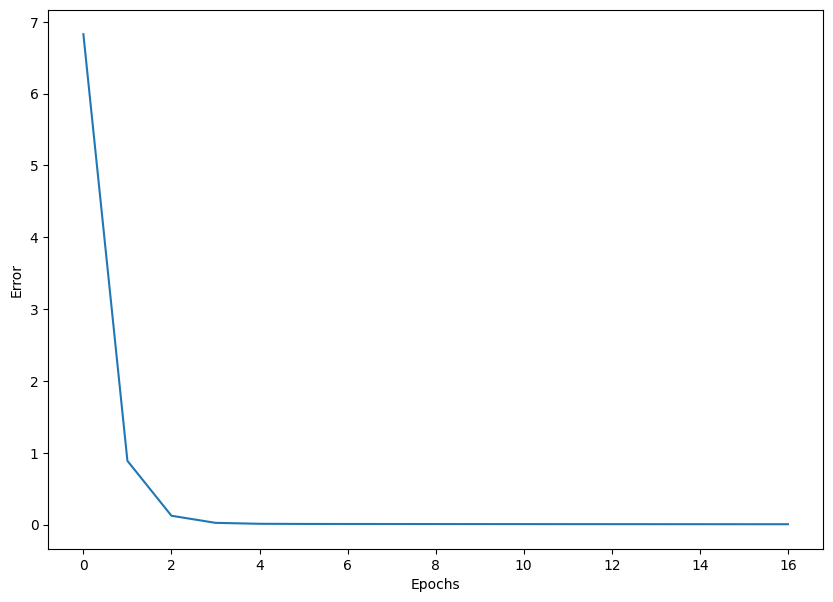

In [4]:
plt.figure(figsize=(10,7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

----------------
### 1-2 딥러닝 프로세스

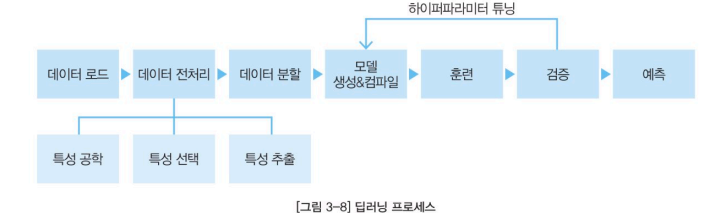

1. 데이터 로드
2. 데이터 전처리
    - 특성 공학
    - 특성 선택
    - 특성 추출
3. 데이터 분할
4. 모델 생성 & 컴파일 : 손실함수, 옵티마이저, 평가지표 등 정의
5. 훈련
6. 검증 : 하이퍼 파라미터 튜닝 > 4단계
7. 예측

------------
## 02. 단순 신경망 훈련

### 2-1. 선형 회귀
단순선형회귀 모형
- 하나의 X가 Y에 미치는 영향 추정, 1차 함수 관계
- y = wx + b
- X: 독립변수
Y: 종속변수
w: 가중치
b: 편향

----
### 2-2. 뉴런
- 뉴런 : node라고도 불리며, 인공 신경망 모델을 구성하는 하나의 신경을 의미한다.
- 신경망 : 여러 개의 레이어를 가지며 1개의 레이어는 1개 이상의 뉴런으로 구성된다.
- 뉴런의 내부에는 가중치가 존재하며, 모델이 훈련을 진행하면서 오차 역전파를 통해 뉴런의 가중치가 업데이트된다.

-------
### 2-3. Dense 레이어
- 심층 신경망 모델을 구성하는 가장 기본 레이어
- 각 레이어와 레이어 사이에 모든 뉴런이 서로 연결되어 있기 때문에, 완전 연결층(Fully Connected Layer)라고 부르기도 한다.

In [5]:
import tensorflow as tf

# 10개의 노드로 이루어진 Dense 레이어
tf.keras.layers.Dense(10)

# ReLU 활성화 함수 적용
tf.keras.layers.Dense(10, activation='relu')

--------
### 2-4. 데이터셋 만들기

In [6]:
# 샘플 데이터셋 생성
x = np.arange(1,6)

# y = 3x + 2
y = 3*x + 2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


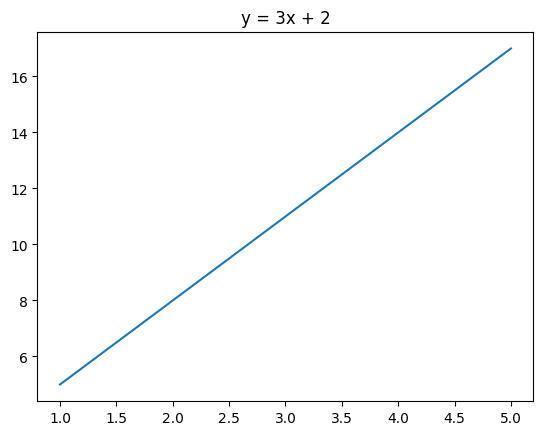

In [7]:
import matplotlib.pyplot as plt

# 시각화
plt.plot(x, y)
plt.title('y = 3x + 2')
plt.show()

-------
### 2-5. Sequential API
- 텐서플로 케라스는 세 가지 방식으로 모델을 생성할 수 있다.
- 그 중 케라스의 Sequential API를 사용하면 매우 간결하게 딥러닝 모델을 만들 수 있다.
- Sequential API 방식 : 층을 이어 붙이듯 시퀀스에 맞게 일렬로 연결하는 방식. 따라서 입력 레이어부터 출력 레이어까지 순서를 갖는다.
- 다만 2개 이상의 입력(다중 입력)이나 2개 이상의 출력(다중 출력)을 갖는 복잡한 구조를 만들 수 없다. 이런 경우 다음에 다룰 Functional API를 사용해야 한다.

--------
#### 2-5-1. 모델 구조

- Sequential 클래스 함수에 파이썬 리스트 형태로 여러 개의 층을 입력한다.
- 대괄호 안에 쉼표로 구분하여 층을 쌓는다.
- add() 함수로 레이어를 추가할 수 있다.
- Sequential 클래스 객체를 만든 뒤, 모델 인스턴스에 층을 추가하는 방식.

In [8]:
import tensorflow as tf

# 리스트형
model = tf.keras.Sequential([
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(5),
        tf.keras.layers.Dense(1)
])

In [9]:
# add 함수로 레이어 추가
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

#### 2-5-2. 입력 데이터 형태

Sequential API를 사용하여 모델을 만들 때 첫번째 층은 반드시 input_shape 매개변수를 지정해야 한다.
- input_shape : 데이터셋의 shape를 tuple 또는 list로 지정할 수 있다.
- shape이 (150, 4)인 경우 > input_shape : (4, ) 또는 [4]
- shape이 (150, 4) : 150개 sample에 대해 4개의 입력변수가 존재한다는 뜻.

In [10]:
import tensorflow as tf

model = tf.keras.Sequential([
  # 입력 데이터의 shape = (150, 4)인 경우
  tf.keras.layers.Dense(10, input_shape = [4]),
  tf.keras.layers.Dense(5),
  tf.keras.layers.Dense(1)
])

#### 2-5-3. 단순 선형 회귀 모델 정의
- 1개의 뉴런을 가지는 Dense layer를 한 개 사용한다.
- input_layer : [1]로 지정
- 1개의 뉴런을 가지는 Dense layer는 1개의 출력값을 가지므로 출력값은 y에 대한 모델의 예측값이다.

In [11]:
# 단순선형회귀 모델 생성
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=[1])
])

---
### 2-6. 모델 요약
Sequential API로 모델을 만들었다면 model.summary()로 모델의 요약을 확인할 수 있다.
- Total params : 모델 내부에 존재하는 모든 파라미터의 합계
- Trainable params : 모델 훈련 시 업데이트할 파라미터의 총 개수
- Non-trainable params : 모델 훈련 시 업데이트하지 않을 파라미터의 총 개수
- 단순 선형 회귀모델에서 업데이트할 파라미터 : 가중치 w, 편향 b

In [12]:
# 모델 요약
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


------
### 2-7. 컴파일

- 모델의 훈련 과정에서 적용할 옵티마이저(optimizer), 손실함수(loss), 평가지표(metric) 등을 정의
- 옵티마이저, 손실함수, 평가지표는 3가지 방법으로 지정할 수 있다.
    - 클래스 인스턴스
    - 함수
    - 사전 정의된 문자열

    (클래스 인스턴스로 지정할 경우 학습률, 모멘텀 등의 하이퍼 파라미터를 사용자가 직접 지정할 수 있다. 하지만 문자열로 지정하는 경우 기본값으로 설정된 하이퍼 파라미터를 사용하며, 하이퍼 파라미터를 수정하기 어렵다)

In [13]:
# 긴 문자열 지정
model.compile(optimizer='sgd', loss='mean_squared_error',
              metrics=['mean_squared_error', 'mean_absolute_error'])

In [14]:
# 짧은 문자열 지정
model.compile(optimizer='sgd', loss='mse', metrics=['mse', 'mae'])

In [15]:
# 클래스 인스턴스 지정
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.005),
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=[tf.keras.metrics.MeanAbsoluteError(),
                       tf.keras.metrics.MeanSquaredError()
              ])

앞에서 정의한 단순선형회귀 모델을 훈련시키기 위해선 다음을 사용
- optimizer는 확률적 경사 하강법 (Stochastic Gradient Descent) 알고리즘인 'sgd'
- 손실함수는 mse
- 평가지표는 mae

In [16]:
# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

---
### 2-8. 훈련

- 생성된 모델 인스턴스에 fit()으로 훈련
- fit() : 입력(x), 출력(y), epoch 수 지정
- 매 epoch가 끝날 때마다 훈련 데이터셋에 대한 손실과 평가지표 출력
- fit()에 검증 데이터셋 옵션 (validation_data)을 지정했다면 검증 셋에 대한 손실과 평가지표도 함께 출력한다.

In [17]:
# 훈련
model.fit(x, y, epochs=5)

Epoch 1/5



1/1 [==============================] - 1s 1s/step - loss: 150.2742 - mae: 11.4251
Epoch 2/5
1/1 [==============================] - 0s 19ms/step - loss: 87.6546 - mae: 8.7631
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 51.1625 - mae: 6.7308
Epoch 4/5
1/1 [==============================] - 0s 15ms/step - loss: 29.8961 - mae: 5.1793
Epoch 5/5
1/1 [==============================] - 0s 12ms/step - loss: 17.5026 - mae: 3.9947


In [18]:
# 단순선형회귀 모델 생성
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=[1])
])

# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

# 훈련
history = model.fit(x, y, epochs = 1200)

Epoch 1/1200
1/1 [==============================] - 1s 596ms/step - loss: 154.9899 - mae: 11.5982
Epoch 2/1200
1/1 [==============================] - 0s 11ms/step - loss: 90.4004 - mae: 8.8946
Epoch 3/1200
1/1 [==============================] - 0s 3ms/step - loss: 52.7603 - mae: 6.8306
Epoch 4/1200
1/1 [==============================] - 0s 12ms/step - loss: 30.8250 - mae: 5.2549
Epoch 5/1200
1/1 [==============================] - 0s 11ms/step - loss: 18.0416 - mae: 4.0519
Epoch 6/1200
1/1 [==============================] - 0s 4ms/step - loss: 10.5916 - mae: 3.1333
Epoch 7/1200
1/1 [==============================] - 0s 0s/step - loss: 6.2495 - mae: 2.4320
Epoch 8/1200
1/1 [==============================] - 0s 13ms/step - loss: 3.7187 - mae: 1.8965
Epoch 9/1200
1/1 [==============================] - 0s 11ms/step - loss: 2.2433 - mae: 1.4876
Epoch 10/1200
1/1 [==============================] - 0s 9ms/step - loss: 1.3830 - mae: 1.1753
Epoch 11/1200
1/1 [==============================] - 0s

훈련에 대한 결과가 저장된 history 변수를 사용하여 epoch별 훈련 손실 및 평가지표를 시각화 할 수 있다.

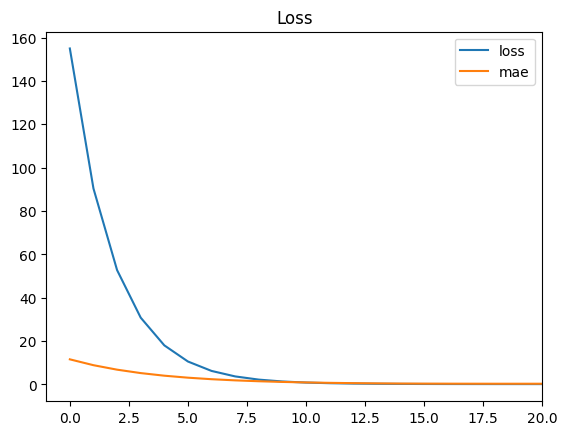

In [19]:
## history 변수를 사용하여 epoch별 훈련 손실 및 평가지표를 시각화 ##
import matplotlib.pyplot as plt

# 20 epoch까지 Loss 수렴에 대한 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
plt.xlim(-1,20)
plt.title('Loss')
plt.legend()
plt.show()

----
### 2-9. 검증

- evaluate() 메소드로 모델의 성능을 검증할 수 있다.
- 여기서는 별도의 검증 셋을 만들어두지 않았으므로 훈련 데이터셋의 x, y를 대입

In [20]:
# 검증
model.evaluate(x, y)

1/1 [==============================] - 1s 630ms/step - loss: 5.7486e-05 - mae: 0.0065


[5.7486446166876704e-05, 0.006507778074592352]

-------
### 2-19. 예측
- predict() 메소드에 새로운 입력 데이터를 넣어주면 예측값을 얻을 수 있다.

In [21]:
# 예측
model.predict([10])

1/1 [==============================] - 0s 339ms/step


array([[32.031452]], dtype=float32)

-------------------
## 03. 심층 신경망으로 이미지 분류

### 3-1. 케라스 내장 데이터셋 로드

- boston_housing : 보스톤 주택 가격 데이터셋 (회귀) : 현재는 오류로 개별적으로 다운 받아야 함
- cifar10 : CIFAR10 이미지 분류 데이터셋 (분류)
- cifar100 : CIFAR100 이미지 분류 데이터셋 (분류)
- mnist : mnist 손글씨 데이터셋 (분류)
- fashion_mnist : 의류 데이터셋 (분류)
- imdb : IMDB 영화 데이터셋 (분류)
- reuters : Reuters 뉴스 토픽 (분류)

In [24]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

In [25]:
# load_data()로 데이터셋 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [26]:
# 로드된 데이터셋 확인
print('train set : ', x_train.shape, y_train.shape)
print('test set : ', x_test.shape, y_test.shape)

train set :  (60000, 28, 28) (60000,)
test set :  (10000, 28, 28) (10000,)


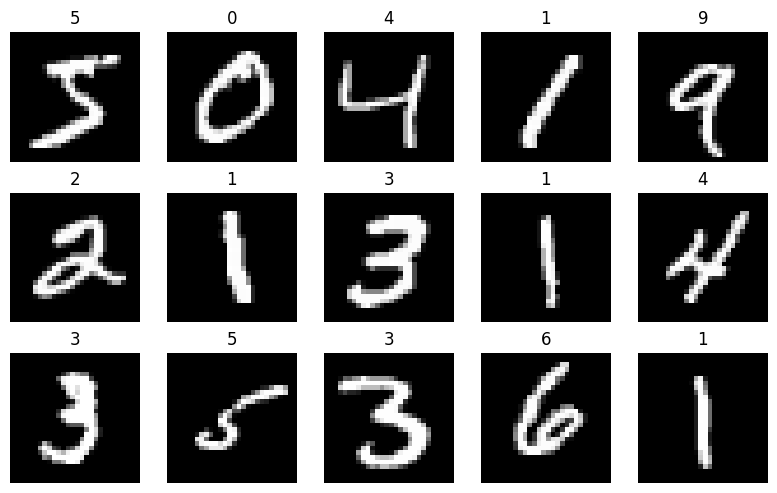

In [27]:
## 데이터 시각화
import matplotlib.pyplot as plt

# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(8, 5)

for i in range(15):
  ax = axes[i//5, i%5]
  
  # imshow로 이미지 시각화
  ax.imshow(x_train[i], cmap = 'gray')
  ax.axis('off')
  ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

--------
### 3-2. 데이터 전처리
- 기존의 데이터는 0부터 255까지의 값을 가진다. 이 값을 255로 나누어 0과 1사이의 값으로 만들어 정규화한다. (gray scale)

In [28]:
# x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

In [29]:
# 픽셀 값의 최소/최대값 확인
print(f'정규화 전] 최소값 : {x_train.min()}, 최대값 : {x_train.max()}')

# 데이터 정규화
x_train = x_train / x_train.max()

# 정규화 후 최소/최대값 확인
print(f'정규화 후] 최소값 : {x_train.min()}, 최대값 : {x_train.max()}')

정규화 전] 최소값 : 0, 최대값 : 255
정규화 후] 최소값 : 0.0, 최대값 : 1.0


In [30]:
# test 셋에도 정규화 동일 적용
x_test = x_test / x_test.max()

In [31]:
# 변환 후 x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

- 정규화하여 학습하는 경우 경사하강법 알고리즘에 의한 수렴 속도가 비정규화된 입력 데이터를 가질 때보다 더 빨리 수렴한다.
- local optimum(국소 최적)에 빠지는 현상을 방지해주는 효과도 있다.

--------
### 3-3. Flatten 레이어
- 정규화를 하면 개별 데이터의 범위는 축소되지만 원본 배열의 형태는 그대로 유지된다.
- Dense 레이어의 입력값는 1차원만 넣을 수 있다. 따라서 이미지 데이터를 1차원으로 전처리한다.

In [34]:
## reshape을 사용하여 1 dimension으로 변환 ##
print(f'변경 전 shape : {x_train.shape}')
print(f'1D으로 shape 변경 후 : {x_train.reshape(60000, -1).shape}')

변경 전 shape : (60000, 28, 28)
1D으로 shape 변경 후 : (60000, 784)


또는 Flatten 레이어를 사용하는 방법도 있다.

In [35]:
## Flatten 레이어를 사용ㅎ여 다차원 데이터를 1차원으로 변환 ##
print(f'변경 전 shape : {x_train.shape}')
print(f'Flatten 적용 후 : {tf.keras.layers.Flatten()(x_train).shape}')

변경 전 shape : (60000, 28, 28)
Flatten 적용 후 : (60000, 784)


-----
### 3-4. 활성화 함수 (Activation Function)
- 입력을 비선형 출력으로 변환해주는 함수
- 일반적으로 선형관계를 나타내는 함수에 비선형성을 추가하는 방법으로 표현된다.
- 자주 사용되는 활성화 함수로는 Sigmoid, Hyperbolic Tangent, ReLU, Leaky ReLU 등이 있다.

In [36]:
# Dense 레이어에 relu 활성화 함수를 적용한 경우
tf.keras.layers.Dense(128, activation='relu')

In [37]:
# Dense 레이어와 relu 활성화 함수 레이어를 별도 적용한 경우
model = tf.keras.Sequential([
        tf.keras.layers.Dense(128),
        tf.keras.layers.Activation('relu')
])

------
### 3-5. 입력과 출력

- 딥러닝 모델을 만들 때는 첫 번째 레이어에 입력 데이터의 형태를 나타내는 input_shape 매개변수를 지정하는 것이 일반적이다.
- 여기선 데이터셋의 크기를 나타내는 60000을 제외하고 이미지의 가로 세로 크기만을 지정해준다.
- 가장 마지막 레이어인 출력층은 반드시 분류해야 할 클래스의 개수와 동일하게 지정해야한다.
- 여기선 0~9까지 총 10개의 클래스로 이루어져있기 때문에 노드 개수가 10이어야 한다.

In [38]:
model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        
        # 노드 = 10개(클래스 개수와 동일) = 마지막 출력층의 노드 개수
        tf.keras.layers.Dense(10, activation='softmax'),
])

In [39]:
# 출력층 노드 = 1인 경우, sigmoid
tf.keras.layers.Dense(1, activation = 'sigmoid')

# 출력층 노드 = 2개 이상인 경우, softmax
tf.keras.layers.Dense(10, activation = 'softmax')

------
### 3-6. 손실함수
<이진 분류기(binary classifier)>
- 출력층의 노드 개수 1개
    - activation = 'sigmoid'
    - loss = 'binary_crossentropy'
- 출력층 노드 개수 2개 이상
    - activation = 'softmax'
    - loss
        - y가 원핫 벡터인 경우 : 'categorical_crossentropy'
        - y가 원핫 벡터가 아닌 경우 : 'sparse_categorical_crossentropy'

In [41]:
# 이진 분류(출력 노드 개수 = 1, sigmoid인 경우)
model.compile(loss = 'binary_crossentropy')

In [42]:
# y가 원핫 벡터인 경우
model.compile(loss = 'categorical_crossentropy')
# y가 원핫 벡터가 아닌 경우
model.compile(loss = 'sparse_categorical_crossentropy')

-------
### 3-7. 옵티마이저 (Optimizer)
- 손실을 낮추기 위해서 신경망의 가중치와 학습률과 같은 신경망의 속성을 변경하는데 사용되는 최적화 방법
- 일반적으로 Adam을 많이 사용한다.

In [43]:
# 클래스 인스턴스로 지정
# 클래스 인스턴스로 지정하는 경우 학습률(lr)과 같은 파라미터를 직접 설정할 수 있다.
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam)

# 문자열로 지정
model.compile(optimizer='adam')

------
### 3-8. 평가지표
- 분류 모델 평가지표 : accuracy, auc, precision, recall 등이 사용된다.
- 리스트 형태로 하나 이상의 평가 지표를 지정할 수 있다.

In [44]:
# 클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[acc])

In [45]:
# 문자열로 지정
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

-----
### 3-9. 훈련

In [46]:
model.fit(x_train, y_train,
          # 검증 셋 지정
          validation_data = (x_test, y_test),
          epochs=10)

Epoch 1/10
1875/1875 [==============================] - 25s 11ms/step - loss: 0.2350 - accuracy: 0.9311 - val_loss: 0.1131 - val_accuracy: 0.9655
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0958 - accuracy: 0.9703 - val_loss: 0.1079 - val_accuracy: 0.9664
Epoch 3/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0676 - accuracy: 0.9791 - val_loss: 0.0786 - val_accuracy: 0.9755
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0515 - accuracy: 0.9841 - val_loss: 0.0793 - val_accuracy: 0.9758
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0404 - accuracy: 0.9871 - val_loss: 0.0825 - val_accuracy: 0.9759
Epoch 6/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0349 - accuracy: 0.9891 - val_loss: 0.0780 - val_accuracy: 0.9775
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0291 - accuracy: 0.9907 - val_loss: 0.1068 - 

-----
### 3-10. 평가

- 훈련이 종료되면 evaluate() 메소드로 모델 성능을 검증하고 평가 결과를 확인할 수 있다.
- evaluate() : compile 단계에서 지정한 손실(loss function)과 정확도(accuracy)를 순서대로 반환한다.

In [47]:
# 검증
test_loss, test_acc = model.evaluate(x_test, y_test)

print('검증 셋 정확도 : ', test_acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.0957 - accuracy: 0.9763
검증 셋 정확도 :  0.9763000011444092


------
### 3-11. 예측

- 예측 : 훈련된 모델로 새로운 이미지 (데이터)의 분류 값을 예측하는 작업
- predict() 메소드에 새로운 이미지 (데이터)를 넣어주면 예측 결과를 반환한다.

In [48]:
predictions = model.predict(x_test)

313/313 [==============================] - 3s 8ms/step


In [49]:
# 첫 번째 데이터에 대한 분류 예측 결과 출력
predictions[0]

array([2.5851372e-12, 2.7054944e-07, 3.0879605e-07, 1.2074171e-06,
       6.7039775e-07, 1.2399438e-08, 3.6443523e-10, 9.9999750e-01,
       1.4260271e-11, 1.3011160e-07], dtype=float32)

numpy의 argmax를 활용하여 가장 높은 확률값을 가지는 클래스를 확인할 수 있다.

In [50]:
import numpy as np

# 0번 index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

# 첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10], axis=1))

7
[7 2 1 0 4 1 4 9 5 9]


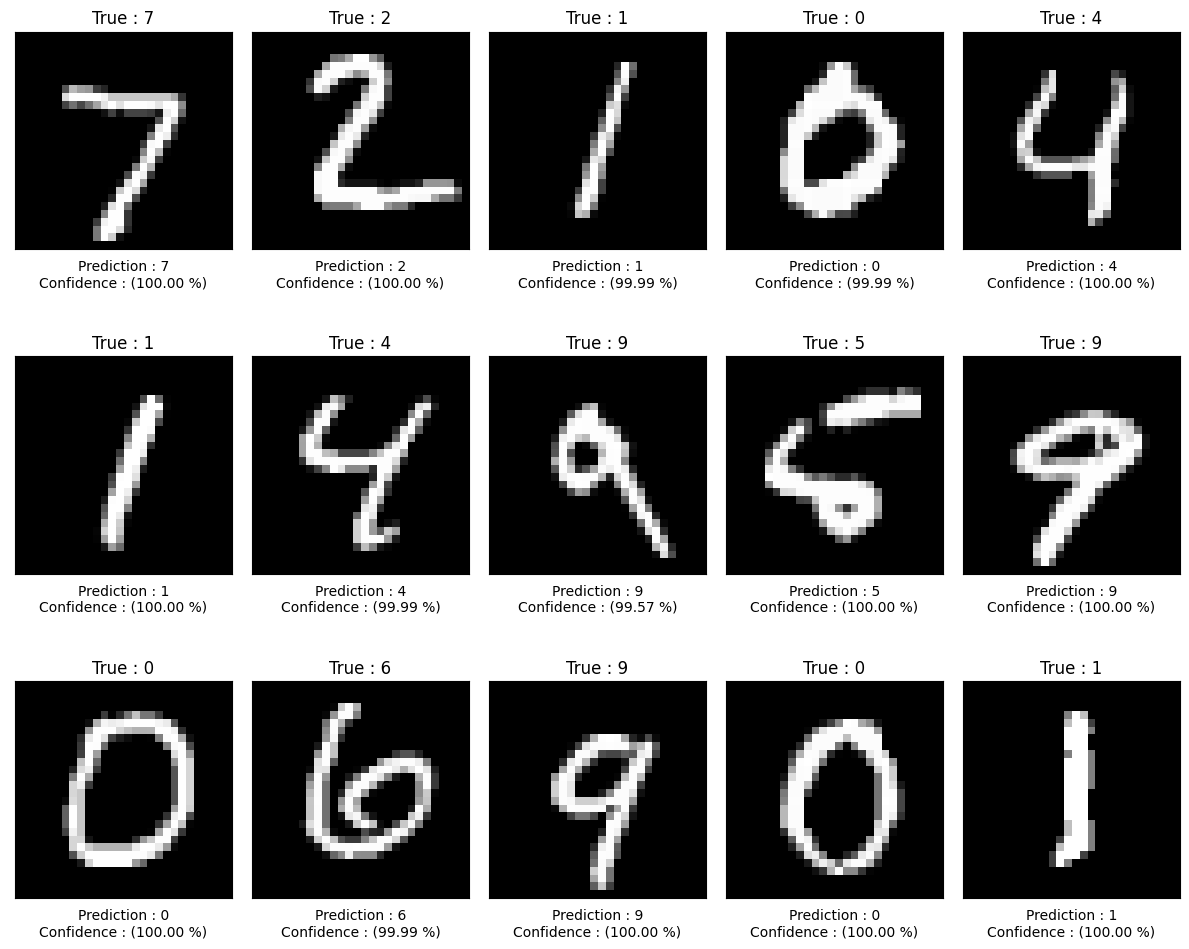

In [51]:
## 데이터 시각화 ##
import matplotlib.pyplot as plt
def get_one_result(idx):
  img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100*np.max(predictions[idx])
  return img, y_true, y_pred, confidence

# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(12, 10)
for i in range(15):
  ax = axes[i//5, i%5]
  img, y_true, y_pred, confidence = get_one_result(i)
  # imshow로 이미지 시각화
  ax.imshow(img, cmap = 'gray')
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(f'True : {y_true}')
  ax.set_xlabel(f'Prediction : {y_pred}\nConfidence : ({confidence:.2f} %)')
plt.tight_layout()
plt.show()